In [1]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise

from pandas_util import load_data

In [2]:
df = load_data("Utilities.csv")
df.set_index("company", inplace=True)
df.head()

,fixed_charge,ror,cost,load_factor,demand_growth,sales,nuclear,fuel_cost
company,,,,,,,,
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [3]:
d = pairwise.pairwise_distances(df, metric="euclidean")
pd.DataFrame(d, columns=df.index, index=df.index)

company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


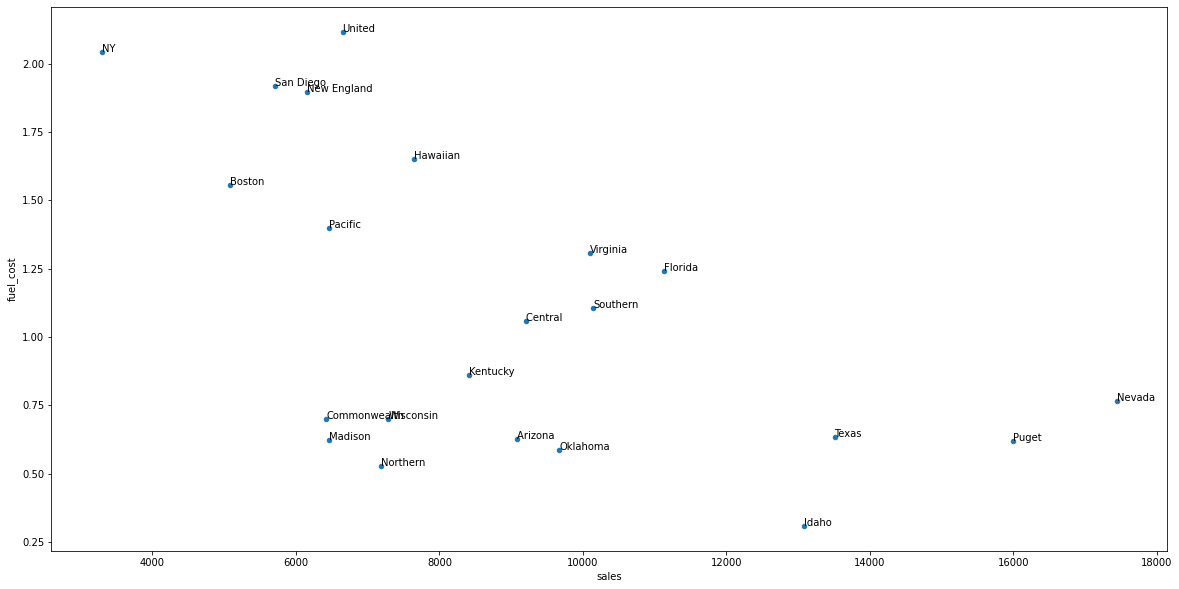

In [4]:
ax = df.plot.scatter(x="sales", y="fuel_cost")
for k, v in df.iterrows():
    xy = (v.sales, v.fuel_cost)
    ax.annotate(k, xy)

In [5]:
# scikit-learn uses population standard deviation
# df_norm = df.apply(preprocessing.scale, axis=1)

# pandas uses sample standard deviation
df_norm = (df - df.mean()) / df.std()

# Compute normalized distance based on sales and fuel cost
dist_norm = pairwise.pairwise_distances(
    df_norm[["sales", "fuel_cost"]], metric="euclidean"
)
pd.DataFrame(dist_norm, columns=df.index, index=df.index)

company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
company,,,,,,,,,,,,,,,,,,,,,
Arizona,1.490116e-08,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638e+00,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,5.214913e-01,2.761745e+00,1.252350
Boston,2.010329e+00,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654e+00,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255e+00,1.100595e+00,1.479261
Central,7.741795e-01,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777e+00,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,8.389668e-01,2.034824e+00,0.510365
Commonwealth,7.587375e-01,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230e+00,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,2.434079e-01,2.547116e+00,1.502093
NY,3.021907e+00,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561e+00,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786e+00,9.525069e-01,2.328691
Florida,1.244422e+00,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123e+00,1.025663,1.722510,...,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417e+00,2.016493e+00,0.313847
Hawaiian,1.885248e+00,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189e+00,1.436822,1.880361,...,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256e+00,8.799342e-01,0.929414
Idaho,1.265638e+00,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,2.980232e-08,1.650417,1.950296,...,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813e+00,3.720421e+00,1.980715
Kentucky,4.612918e-01,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417e+00,0.000000,0.697674,...,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,4.267801e-01,2.308613e+00,0.929141


### Dendrograms: Displaying clustering process and results

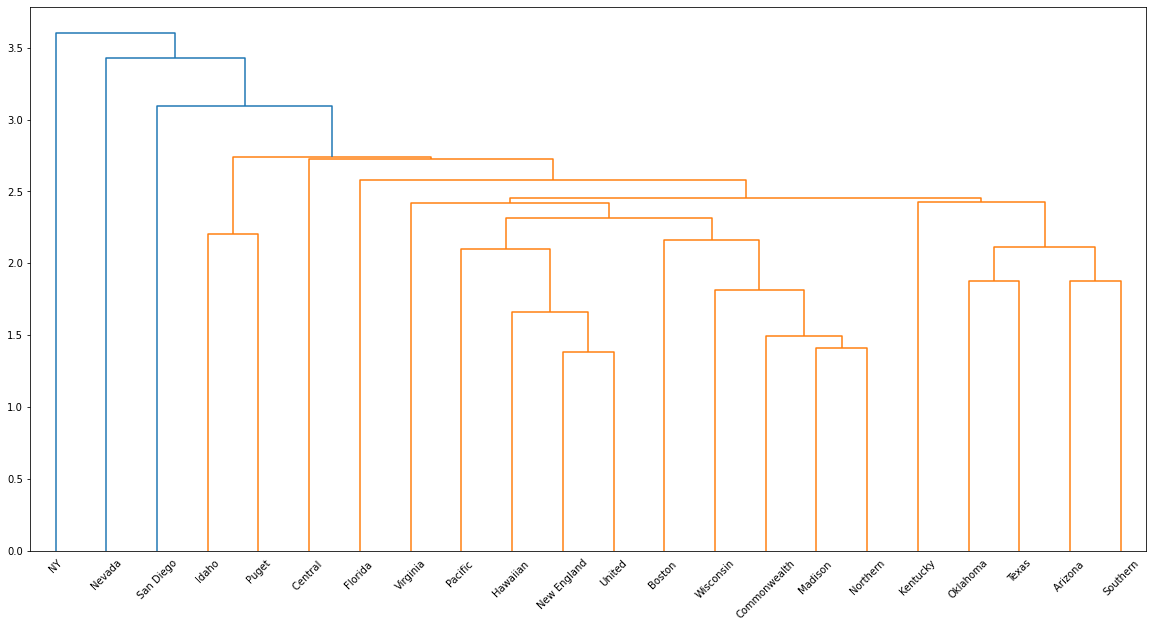

In [6]:
# method = 'single' | 'complete' | 'average' | 'weighted' | 'centroid' | 'median' | 'ward'
Z = linkage(df_norm, method="single")
_ = dendrogram(Z, labels=df_norm.index, color_threshold=2.75)

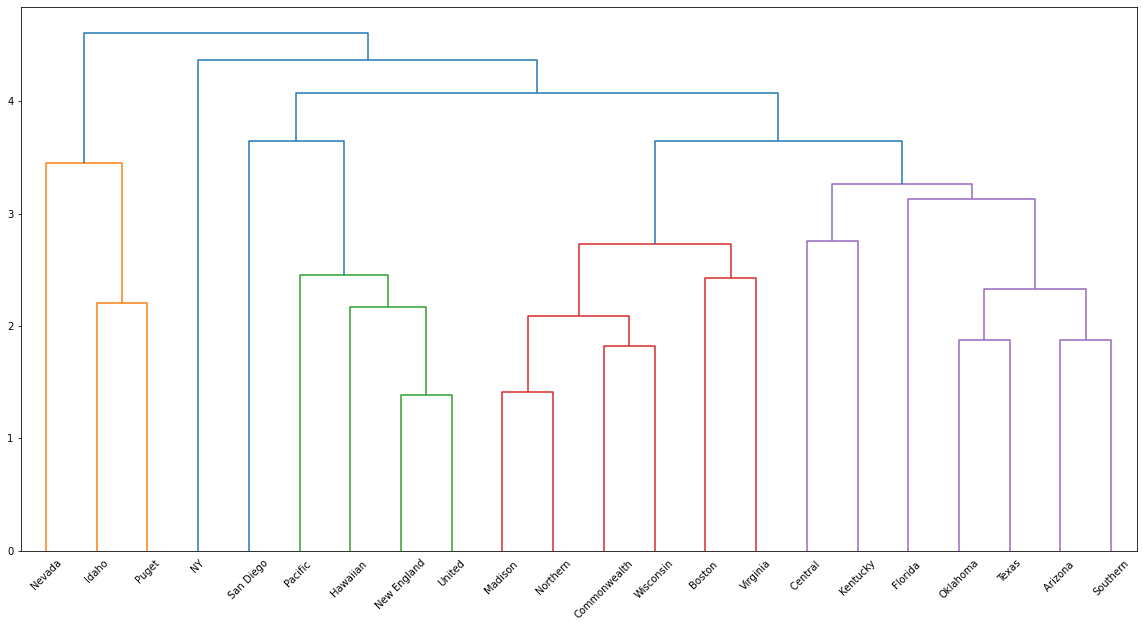

In [7]:
Z = linkage(df_norm, method="average")
_ = dendrogram(Z, labels=df_norm.index, color_threshold=3.6)

## Computing cluster membership by "cutting" the dendrogram


In [8]:
# Single linkage (output modified for clarity)
memb = fcluster(linkage(df_norm, method="single"), 6, criterion="maxclust")
memb = pd.Series(memb, index=df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ": ", ", ".join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


In [9]:
# Average linkage (output modified for clarity)
memb = fcluster(linkage(df_norm, method="average"), 6, criterion="maxclust")
memb = pd.Series(memb, index=df_norm.index)

for key, item in memb.groupby(memb):
    print(key, ": ", ", ".join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


# Creating heatmap

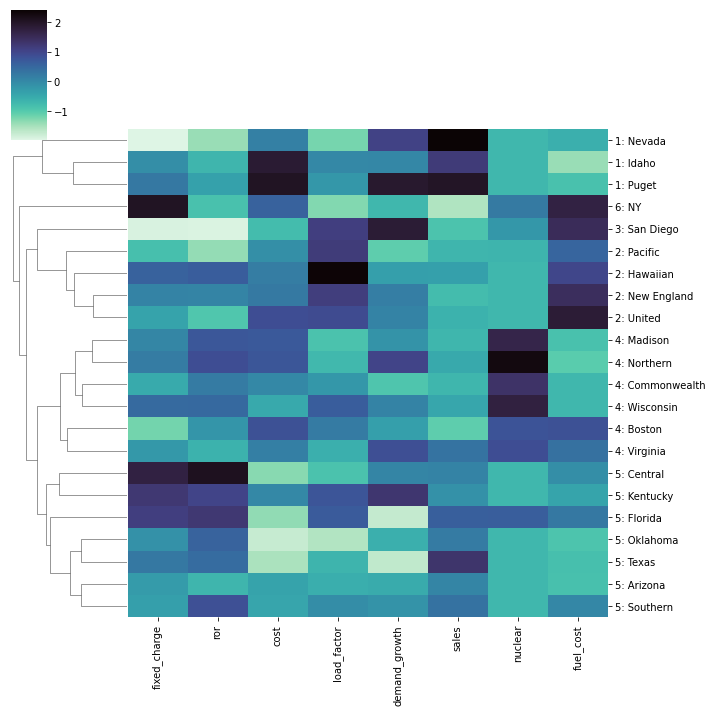

In [10]:
# Set labels as cluster membership and utility name
df_norm.index = [
    "{}: {}".format(cluster, state) for cluster, state in zip(memb, df_norm.index)
]

# Plot heatmap
# the '_r' suffix reverses the color mapping to large = dark
sns.clustermap(df_norm, method="average", col_cluster=False, cmap="mako_r")

## Non-hierarchical clustering: the k-means algorithm

In [11]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ":", ", ".join(item.index))

0 : 4: Commonwealth, 4: Madison , 4: Northern, 4: Wisconsin, 4: Virginia
1 : 4: Boston , 2: Hawaiian , 2: New England, 2: Pacific , 3: San Diego, 2: United
2 : 5: Arizona , 5: Central , 5: Florida , 5: Kentucky, 5: Oklahoma, 5: Southern, 5: Texas
3 : 6: NY
4 : 1: Nevada
5 : 1: Idaho, 1: Puget


In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_norm.columns)
pd.set_option("precision", 3)
centroids

,fixed_charge,ror,cost,load_factor,demand_growth,sales,nuclear,fuel_cost
0,-0.011,0.331,0.219,-0.358,0.166,-0.402,1.565,-0.595
1,-0.618,-0.625,0.202,1.148,0.056,-0.740,-0.372,1.176
2,0.504,0.780,-0.986,-0.338,-0.490,0.352,-0.523,-0.411
3,2.037,-0.863,0.578,-1.295,-0.719,-1.581,0.214,1.693
4,-1.973,-1.442,0.117,-1.228,1.045,2.402,-0.715,-0.602
5,0.086,-0.529,1.950,-0.107,0.965,1.584,-0.715,-1.148


In [13]:
# Calculate distances of each data point to the cluster centers.
distances = kmeans.transform(df_norm)

# Find closest cluster for each data point.
min_squared_distances = distances.min(axis=1) ** 2

# Combine with cluster labels into a data frame
df = pd.DataFrame(
    {"squared_distance": min_squared_distances, "cluster": kmeans.labels_},
    index=df_norm.index,
)

# Group by cluster and print information
for cluster, data in df.groupby("cluster"):
    count = len(data)
    within_cluster_sum_squared = data.squared_distance.sum()
    print(
        f"Cluster {cluster} (count members): {within_cluster_sum_squared:.2f} within cluster"
    )

Cluster 0 (count members): 10.18 within cluster
Cluster 1 (count members): 21.19 within cluster
Cluster 2 (count members): 26.51 within cluster
Cluster 3 (count members): 0.00 within cluster
Cluster 4 (count members): 0.00 within cluster
Cluster 5 (count members): 2.42 within cluster


In [14]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric="euclidean"))

,0,1,2,3,4,5
0,0.000,3.251,2.704,3.983,4.647,3.727
1,3.251,0.000,3.299,3.891,4.721,4.109
2,2.704,3.299,0.000,4.143,4.440,3.843
3,3.983,3.891,4.143,0.000,6.461,5.385
4,4.647,4.721,4.440,6.461,0.000,3.266
5,3.727,4.109,3.843,5.385,3.266,0.000


<AxesSubplot:>

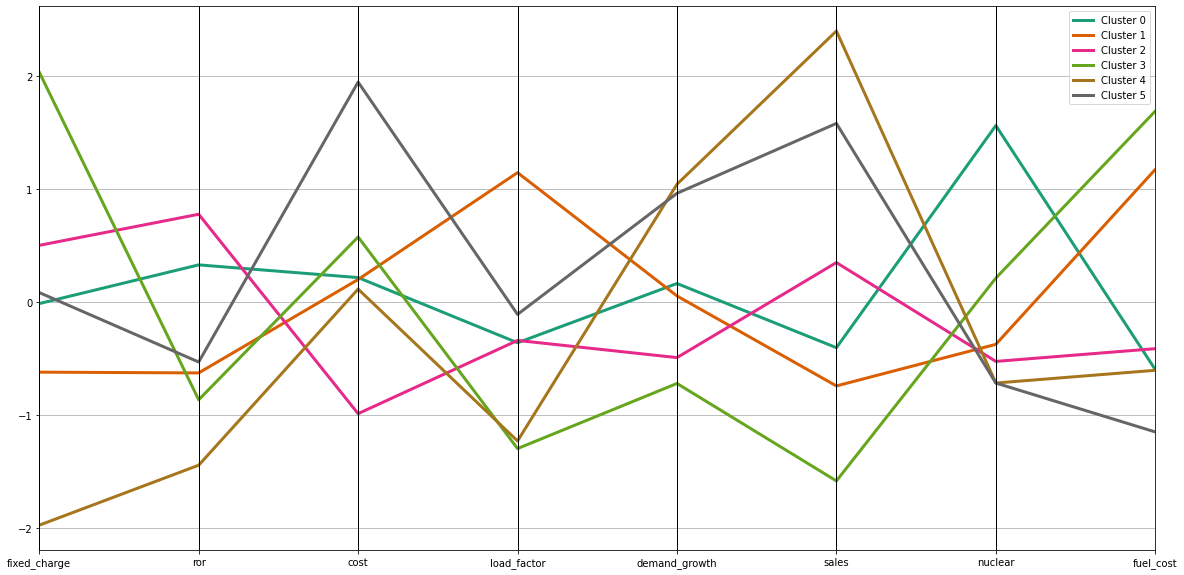

In [15]:
centroids["cluster"] = [f"Cluster {i}" for i in centroids.index]
parallel_coordinates(centroids, class_column="cluster", colormap="Dark2", linewidth=3)

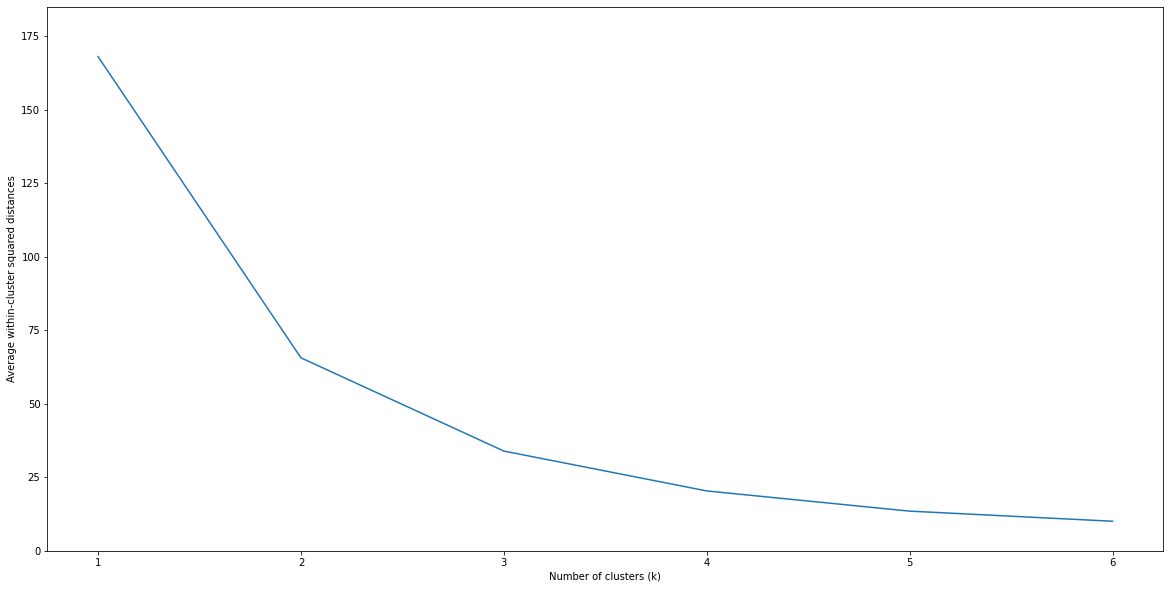

In [16]:
# Plotting elbow chart
inertia = []

for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({"n_clusters": range(1, 7), "inertia": inertia})
ax = inertias.plot(x="n_clusters", y="inertia")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average within-cluster squared distances")
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)